# Semana 10 - Previsão

Anteriormente, usamos a função de correlação para medir a força da relação linear entre duas variáveis. Para a maioria das aplicações, saber que existe tal relação linear não é suficiente. Queremos entender a natureza do relacionamento. É aqui que usaremos a regressão linear simples.

## Modelo

Lembre-se de que estávamos investigando a relação entre o número de amigos de um usuário da *Facedata* e a quantidade de tempo que o usuário passa no site todos os dias. Vamos supor que, de fato, ter mais amigos faz com que as pessoas passem mais tempo no site.

Nossa *CEO* pede que você construa um modelo que descreva esse relacionamento. Como você encontrou um relacionamento linear bastante forte, um lugar natural para começar é um modelo linear (**muito similar à uma equação de 1o grau**). Em particular, você supõe que existem constantes $\alpha$ e $\beta$ tais que: $$ y = \alpha + \beta x + \varepsilon, $$
onde
*   $y$ é o número de minutos que um usuário gasta no site diariamente,
*   $x$ é o número de amigos (na rede) que um usuário tem e
*   $\varepsilon$ é um termo de erro aleatório que representa o fato de que existem outros fatores não contabilizados por este modelo simples.

###Suposições

As suposições (ou premissas) desempenham um papel fundamental no modelo de regressão linear, pois são os pressupostos básicos que precisam ser atendidos para que os resultados obtidos sejam confiáveis e interpretações corretas possam ser feitas. Essas premissas são essenciais para autenticar a validade e a eficácia do modelo. Não iremos listar todos por conta do nível deste curso, mas podemos citar algumas como:
*    *Linearidade*: Estabelece que a relação entre a variável *output* e a variável *input* é aproximadamente linear. Isso significa que a relação entre as variáveis pode ser representada por uma linha reta no gráfico de dispersão. Se a relação não for linear, o modelo de regressão linear simples pode não ser apropriado e pode ser necessário explorar outros modelos;

*    *Independência*: Assume que as observações são independentes umas das outras. Isso significa que os valores de erro para cada observação não estão correlacionados. A violação dessa premissa pode levar a resultados enviesados e interpretações incorretas dos coeficientes do modelo;

*    *Tipo de output*: Pressupõe que a variável *output* é um atributo **quantitativo contínuo**.

> Ao considerar e verificar essas premissas, os cientista de dados garantem a robustez e a validade do modelo de regressão linear. Ao atender a essas premissas, podemos ter maior confiança nos resultados e nas interpretações feitas a partir do modelo, permitindo a tomada de decisões informadas com base na análise de regressão.

###Aprendizado

O termo **aprendizado** se refere à estimação do modelo em questão. Neste caso de regressão linear, temos interesse em descobrir qual reta (de todas as possíveis retas) se adequa melhor para descrever a relação entre *input* e *output*.

> Neste curso, iremos pular os cálculos (tediosos) e veremos na prática como aplicar este modelo em nossos dados.

###Prática

Em geral, sempre é seguido um mesmo protocolo para ajuste, avaliação e previsão de um modelo de aprendizado de máquina.

####Organizando dados

Vamos recuperar os dados que relacionam o número de minutos que um usuário passa no site com o número de amigos que ele possui na rede:

In [ ]:
# Carregando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Dados
num_amigos = [49,41,40,25,21,21,19,19,18,18,16,15,
               15,15,15,14,14,13,13,13,13,12,12,11,10,
               10,10,10,10,10,10,10,10,10,10,10,10,10,
               10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,
               8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,
               7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,
               6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,
               5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,
               4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,
               3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,
               2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,
               1,1,1,1,1,1,1,1,1,1,1,1,1]

minutos_diarios = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,
                   41.42,31.22,34.76,54.01,38.79,47.59,49.1,
                   27.66,41.03,36.73,48.65,28.12,46.62,35.57,
                   32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,
                   36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,
                   33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,
                   22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,
                   35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,
                   36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,
                   25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,
                   32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,
                   16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,
                   16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,
                   35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,
                   21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,
                   13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,
                   25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,
                   35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,
                   37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,
                   29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,
                   32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,
                   9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,
                   31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,
                   10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,
                   22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [ ]:
# Transformando para pd.DataFrame (porque agora temos + de 1 coluna)
df_qtd_tempo = pd.DataFrame({
    "num_amigos": num_amigos,
    "minutos_diarios": minutos_diarios
})

df_qtd_tempo

,num_amigos,minutos_diarios
0,49,68.77
1,41,51.25
2,40,52.08
3,25,38.36
4,21,44.54
...,...,...
198,1,23.48
199,1,8.38
200,1,27.81
201,1,32.35


####Verificando premissas

Estabelecemos que utilizaremos o número de amigos de um usuário para predizer o tempo (em minutos) que este mesmo usuário passa na rede. Assim:
*    *input*: `num_amigos`
*    *output*: `minutos_diarios`

In [ ]:
# Premissa 1: Linearidade ###
# A relacao entre 'num_amigos' e 'minutos_diarios' deve ser linear
# Se a relacao e linear, o coeficiente de correlacao esta longe de zero

# Verificando a correlacao entre as variaveis
df_qtd_tempo.corr()

,num_amigos,minutos_diarios
num_amigos,1.000000,0.573679
minutos_diarios,0.573679,1.000000


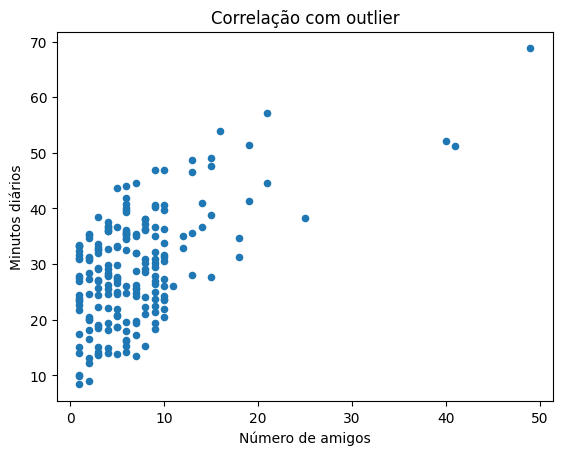

In [ ]:
# Visualizando a correlacao entre as variaveis
df_qtd_tempo.plot.scatter(x='num_amigos', y='minutos_diarios')
plt.title("Correlação com outlier")
plt.xlabel("Número de amigos")
plt.ylabel("Minutos diários")
plt.show()

In [ ]:
# Premissa 2: Independência ###
# A independencia assumida entre os usuarios e algo mais teorico.
# Imagine que cada usuario acessa a rede em sua casa,
# de forma não programada e nao combinada...
# > Entao, a independencia e plausivel!

# Premissa 3: Tipo de output ###
# A variavel 'minutos_diarios' e um atributo quantitativo continuo
df_qtd_tempo['minutos_diarios'].describe()

count    203.000000
mean      29.163300
std        9.868004
min        8.380000
25%       22.265000
50%       28.660000
75%       35.360000
max       68.770000
Name: minutos_diarios, dtype: float64

<Axes: ylabel='Frequency'>

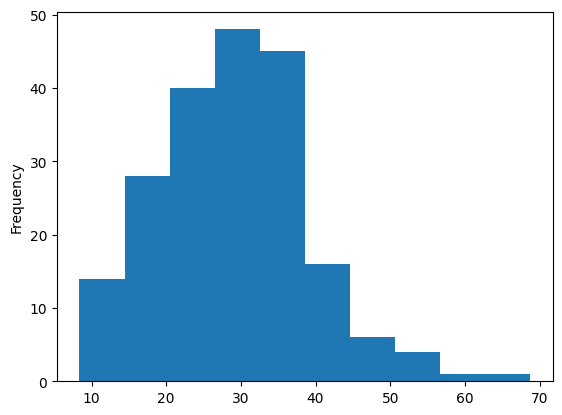

In [ ]:
# Histograma
df_qtd_tempo['minutos_diarios'].plot.hist()

####Separando dados

Anteriormente, vimos uma abordagem fundamental para evitar o sobreajuste na qual envolve separar (de forma aleatória) a base em uma parte de **treino** e outra de **teste**:

In [ ]:
from sklearn.model_selection import train_test_split

# Definindo conjunto de treino e teste simultaneamente
# Aqui, o conjunto de treino sera 80% dos dados
treino, teste = train_test_split(df_qtd_tempo,
                                 train_size = 0.80,
                                 random_state = 123)
# random_state = 123 foi escolhido aleatoriamente
# use o numero que achar melhor

print(treino.shape)
print(teste.shape)

(162, 2)
(41, 2)


####Treinando o modelo

Finalmente, iremos definir e treinar nosso modelo através dos seguintes passos:

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Definindo input e output - treinamento
X_treino = sm.add_constant(treino['num_amigos'])
y_treino = treino['minutos_diarios']

# Definindo o modelo de regressao linear
reg = LinearRegression()

# Estimando o modelo
modelo_estimado = reg.fit(X = X_treino,
                          y = y_treino)

####Avaliando a performance

Vimos que a *performance* é uma métrica de medir o quão adequado um modelo está aos seus dados. No caso da regressão linear, iremos utilizar o **coeficiente de determinação**, popularmente chamado de $R^2$. Esta métrica varia entre 0 e 1, por vezes sendo expresso em termos percentuais. Nesse caso, expressa a quantidade da variância dos dados que é explicada pelo modelo linear. Assim, quanto maior o $R^2$, mais explicativo é o modelo linear, ou seja, melhor ele se ajusta aos dados.

> Por exemplo, um $R^2 = 0,356$ significa que o modelo linear explica 35,6\% da variância do *output* a partir dos *inputs* incluídos naquele modelo:

In [ ]:
modelo_estimado.score(X = X_treino, y = y_treino)

0.3560652811384101

> No exemplo, calculamos um $R^2$ de 0,356, o que nos diz que nosso modelo é **apenas razoável** em ajustar os dados e que claramente há outros fatores em jogo. Lembre-se: $$\text{Todos os modelos erram mas alguns são úteis!}$$

####Interpretando o modelo

Parte do aprendizado para este modelo é decidir quais os melhores valores para $\alpha$ e $\beta$. Podemos recuperá-los utilizando:

In [ ]:
# alfa (tambem chamado de intercepto)
alfa = modelo_estimado.intercept_

# beta
beta = modelo_estimado.coef_[1]

print(alfa)
print(beta)

22.725197965805556
0.8962471498193134


O modelo de regressão linear é um dos mais simples (e mais úteis - não se engane) no aprendizado de máquina. Ele nos permite uma boa interpretação do que ocorre no processo de aprendizado. Analisando os valores ajustados para $alpha = 22,725$ e $beta = 0,896$, nosso modelo diz que esperamos que um usuário com $n$ amigos passe $22,725 + n * 0,896$ minutos na rede social. Ou seja, prevemos que um usuário sem amigos na *Facedata* ainda passaria cerca de 23 minutos por dia no site. E para cada amigo adicional, esperamos que um usuário passe quase um minuto a mais no site.

####Previsão

A partir da estimação de $alpha = 22,725$ e $beta = 0,896$, obtemos a seguinte equação: $$ y = 22,725 + 0,896 x. $$ Esta será nossa regra para qualquer previsão. Tendo `x`, ou seja, sabendo o número de amigos de um usuário, conseguiremos predizer o tempo que ele passa na rede social. Vamos utilizar o conjunto de `teste` que foi separado anteriormente:

In [ ]:
# Definindo input e output - teste
X_teste = sm.add_constant(teste['num_amigos'])
y_teste = teste['minutos_diarios']

# Previsao
previsao = modelo_estimado.predict(X = X_teste)
print(previsao)

[30.79142231 28.10268086 24.51769227 25.41393942 34.37641091 25.41393942
 26.31018657 28.10268086 30.79142231 25.41393942 25.41393942 23.62144512
 28.99892801 28.10268086 28.99892801 31.68766946 41.54638811 27.20643371
 23.62144512 34.37641091 26.31018657 26.31018657 25.41393942 23.62144512
 23.62144512 28.99892801 27.20643371 31.68766946 27.20643371 30.79142231
 29.89517516 26.31018657 23.62144512 27.20643371 25.41393942 27.20643371
 26.31018657 24.51769227 31.68766946 28.10268086 24.51769227]


In [ ]:
# Calculando o R2 para a previsao - quanto maior, melhor
modelo_estimado.score(X = X_teste, y = y_teste)

0.19746901087079405

####Visualizando os resultados

Por fim, podemos visualizar os resultados - tanto o modelo resultante quanto as previsões realizadas - e comparar visualmente com os valores verdadeiros:

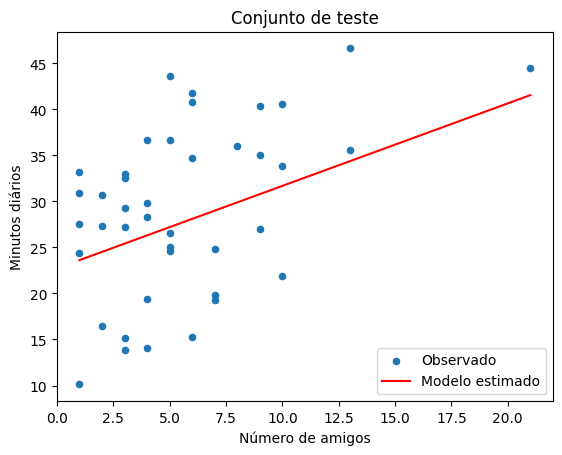

In [ ]:
# Grafico de dispersao - conjunto de teste
teste.plot.scatter(x = 'num_amigos', y = 'minutos_diarios', label='Observado')

# Desenhando a linha de previsao
x_prev = np.linspace(teste['num_amigos'].min(),
                     teste['num_amigos'].max(),
                     100).reshape(-1, 1)
y_prev = alfa + beta * x_prev
plt.plot(x_prev, y_prev, color='red', label='Modelo estimado')

# Rotulos e titulo
plt.xlabel("Número de amigos")
plt.ylabel("Minutos diários")
plt.title('Conjunto de teste')

# Legenda
plt.legend()

# Exibindo o grafico
plt.show()